In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("vgsales.csv")

In [3]:
#ydata_profiling.ProfileReport(df)

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(16719, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
df.describe(include="object")

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


In [9]:
df.loc[df["User_Score"]=="tbd"]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
119,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.45,2.59,0.0,0.66,6.71,NaN,NaN,tbd,NaN,"Pipeworks Software, Inc.",E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.0,0.54,3.98,61.0,21.0,tbd,NaN,Digital Eclipse,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,Majesco Entertainment,1.51,1.03,0.0,0.27,2.81,NaN,NaN,tbd,NaN,"Majesco Games, Majesco",T
645,uDraw Studio,Wii,2010.0,Misc,THQ,1.65,0.57,0.0,0.20,2.42,71.0,9.0,tbd,NaN,THQ,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.0,0.00,0.01,67.0,9.0,tbd,NaN,Planet Interactive,E
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.0,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.0,0.00,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon,E
16708,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.0,0.00,0.01,NaN,NaN,tbd,NaN,Big John Games,E


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

<Axes: >

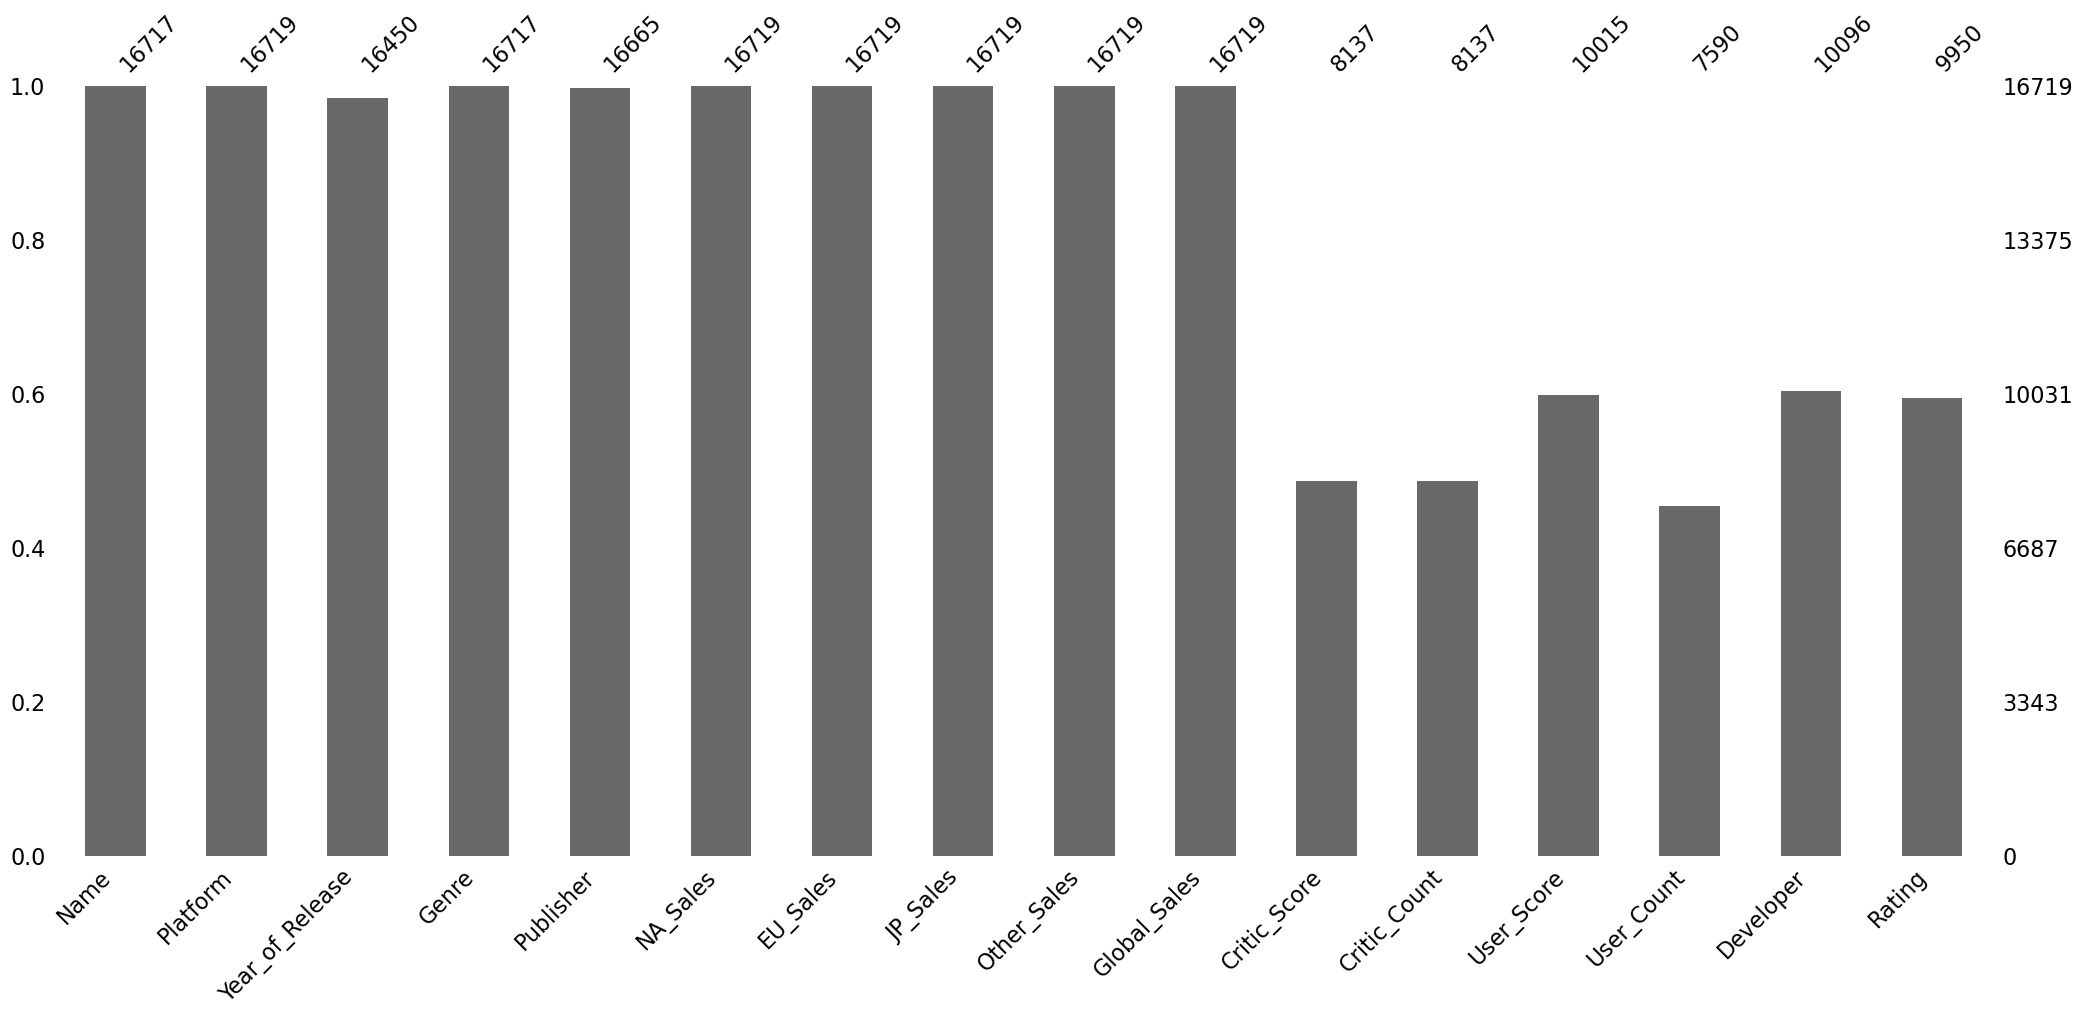

In [12]:
msno.bar(df, n=16719)

In [13]:
missing_data=["tbd"]
df=pd.read_csv("vgsales.csv",na_values=missing_data)

In [14]:
df.dropna(subset=["Name","Year_of_Release","Genre","Publisher"],inplace= True)

In [15]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

<Axes: xlabel='Critic_Score', ylabel='Count'>

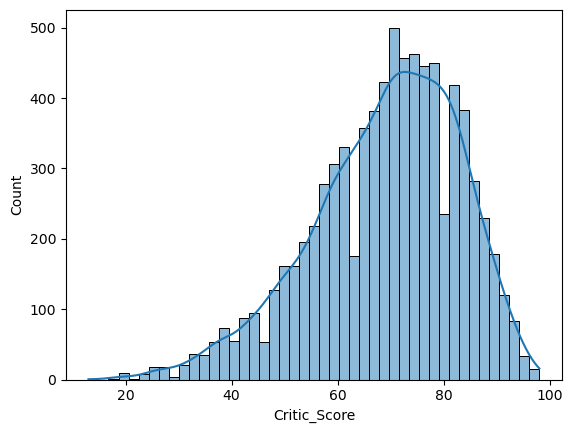

In [16]:
sns.histplot(df,x="Critic_Score", kde=True)

<Axes: xlabel='Critic_Count', ylabel='Count'>

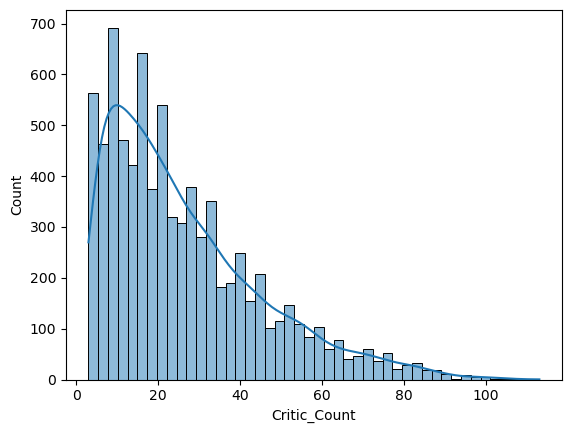

In [17]:
sns.histplot(df,x="Critic_Count", kde=True)

<Axes: xlabel='User_Count', ylabel='Count'>

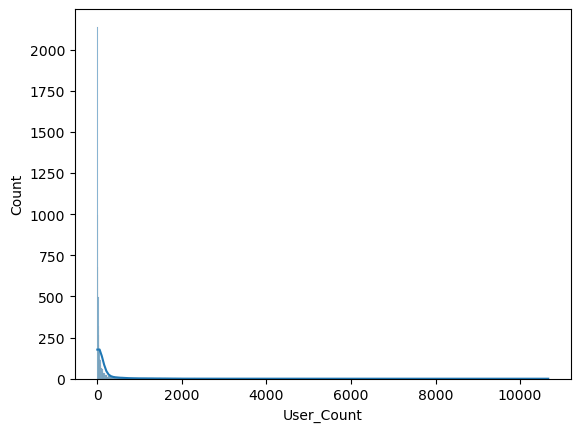

In [18]:
sns.histplot(df,x="User_Count", kde=True)

<Axes: xlabel='User_Score', ylabel='Count'>

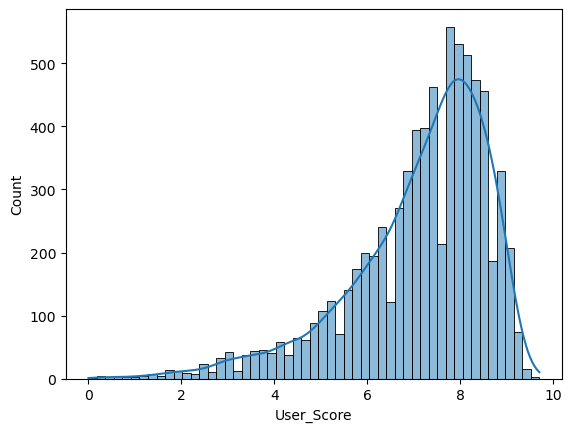

In [19]:
User_Score_find_shape=df.dropna(subset=["User_Score"])
User_Score_find_shape["User_Score"] = User_Score_find_shape["User_Score"].astype(float)

sns.histplot(User_Score_find_shape,x="User_Score", kde=True)

From the 4 graphs it is suitable to replace the Null values with teh median 

In [20]:
df["Critic_Count"].fillna(df["Critic_Count"].median(), inplace=True)
df["Critic_Score"].fillna(df["Critic_Score"].median(), inplace=True)
df["User_Count"].fillna(df["User_Count"].median(), inplace=True)

In [21]:
User_Score_find_shape["User_Score"].median()

7.5

In [22]:
df["User_Score"].fillna(value=7.5, inplace=True)
df["User_Score"]=df["User_Score"]*10

In [23]:
df['Year_of_Release']=df['Year_of_Release'].astype(int)
df['Critic_Count']=df['Critic_Count'].astype(int)
df['User_Count']=df['User_Count'].astype(int)
df["User_Score"]=df["User_Score"].astype(int)

In [24]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6512
Rating             6649
dtype: int64

<Axes: xlabel='Critic_Score', ylabel='Count'>

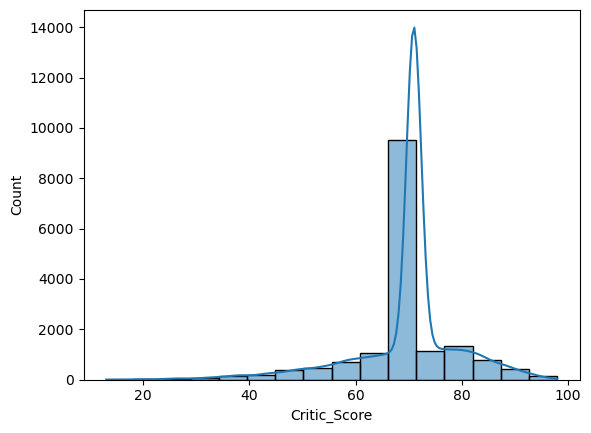

In [25]:
sns.histplot(df,x="Critic_Score", kde=True)

<Axes: xlabel='Critic_Count', ylabel='Count'>

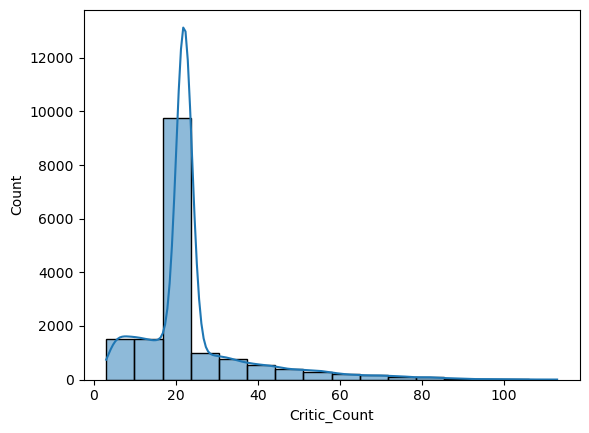

In [26]:
sns.histplot(df,x="Critic_Count", kde=True)

<Axes: xlabel='User_Count', ylabel='Count'>

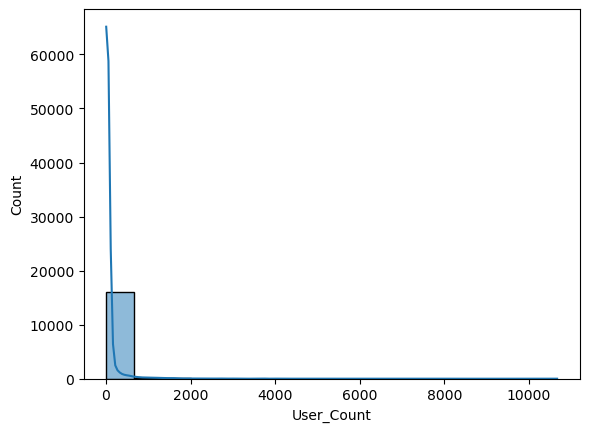

In [27]:
sns.histplot(df,x="User_Count", kde=True)

In [28]:
dfQ1_1=df.nlargest(5,"Global_Sales",keep="all")

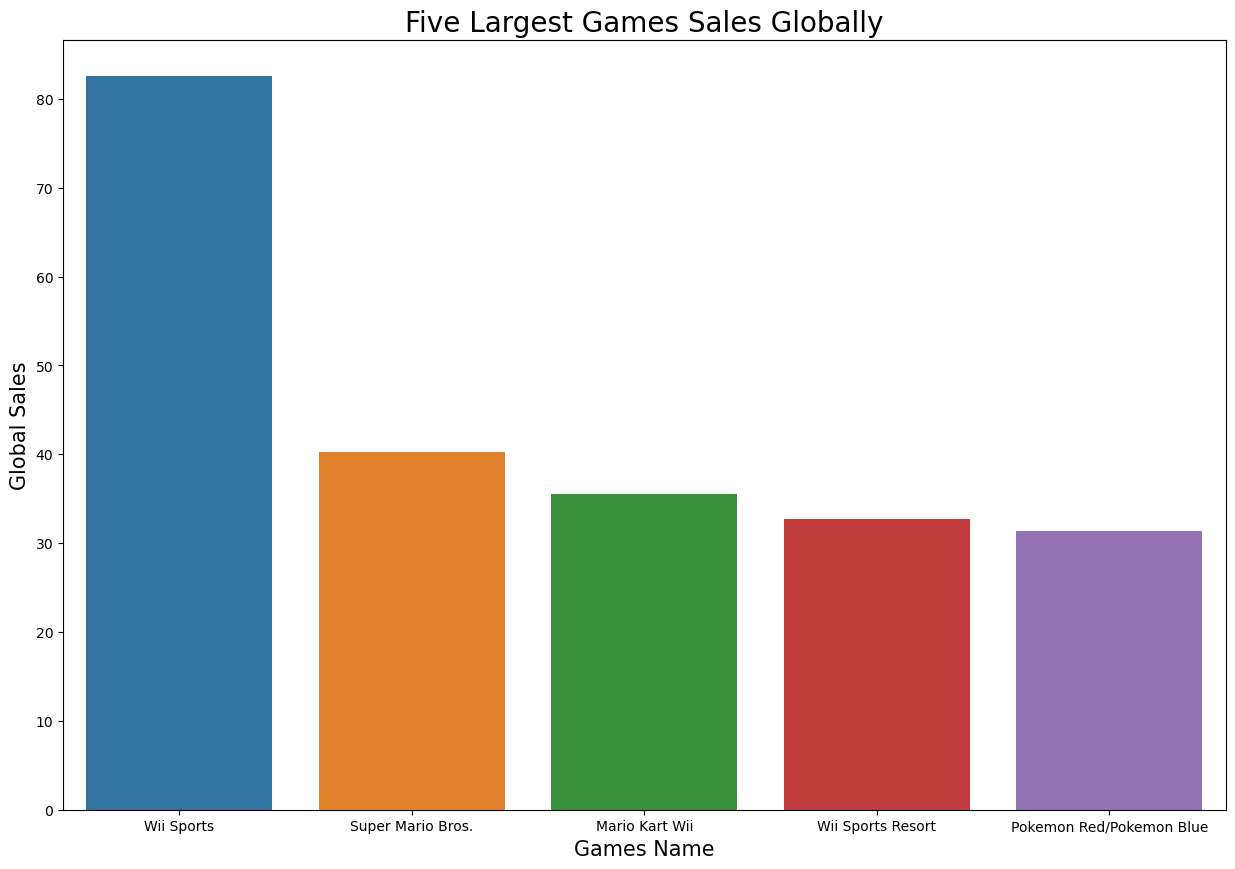

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(dfQ1_1,x="Name",y="Global_Sales")
plt.title("Five Largest Games Sales Globally",fontsize=20)
plt.xlabel("Games Name",fontsize=15)
plt.ylabel("Global Sales",fontsize=15);

In [30]:
dfQ1_2=df[(df["Year_of_Release"]>=2010) & (df["Year_of_Release"]<=2014)]

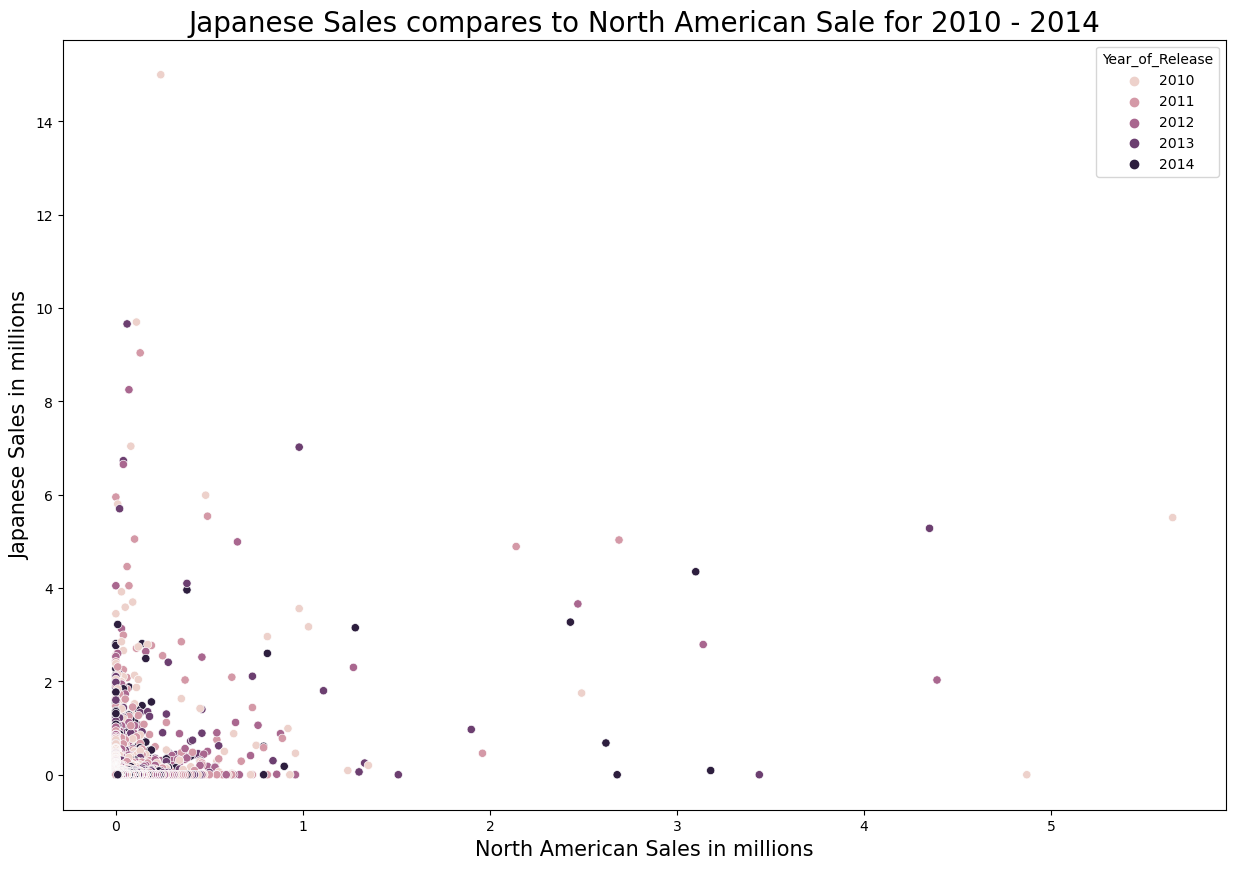

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American Sales in millions",fontsize=15)
plt.ylabel("Japanese Sales in millions",fontsize=15);

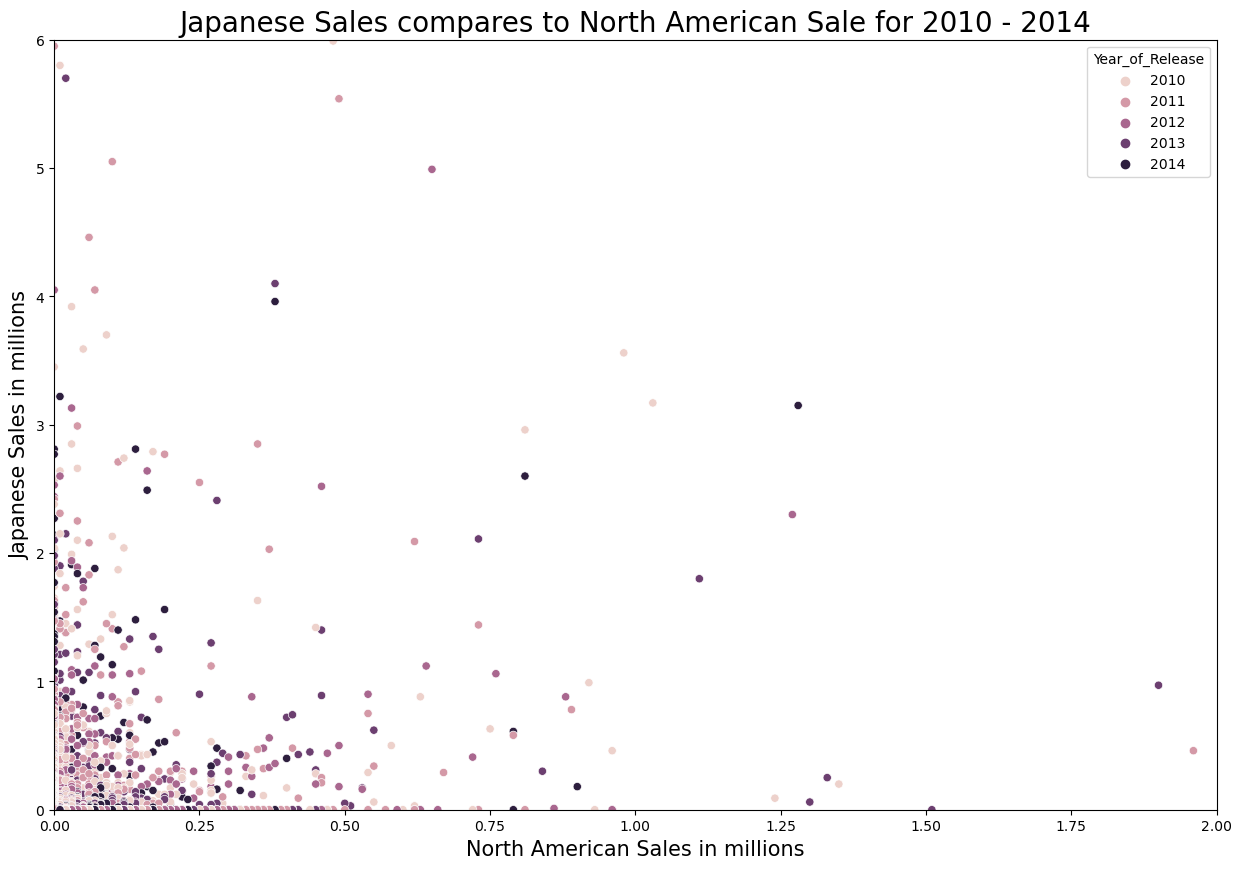

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American Sales in millions",fontsize=15)
plt.ylabel("Japanese Sales in millions",fontsize=15)
plt.xlim(0,2)
plt.ylim(0,6);

In [33]:
df["Genre"].value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

In [34]:
Action=df[df["Genre"]=="Action"]
Sports=df[df["Genre"]=="Sports"]
Role_Playing=df[df["Genre"]=="Role-Playing"]
Shooter=df[df["Genre"]=="Shooter"]

In [35]:
dfQ1_3=pd.concat([Action,Sports,Role_Playing,Shooter])
dfQ1_3=pd.DataFrame(dfQ1_3)

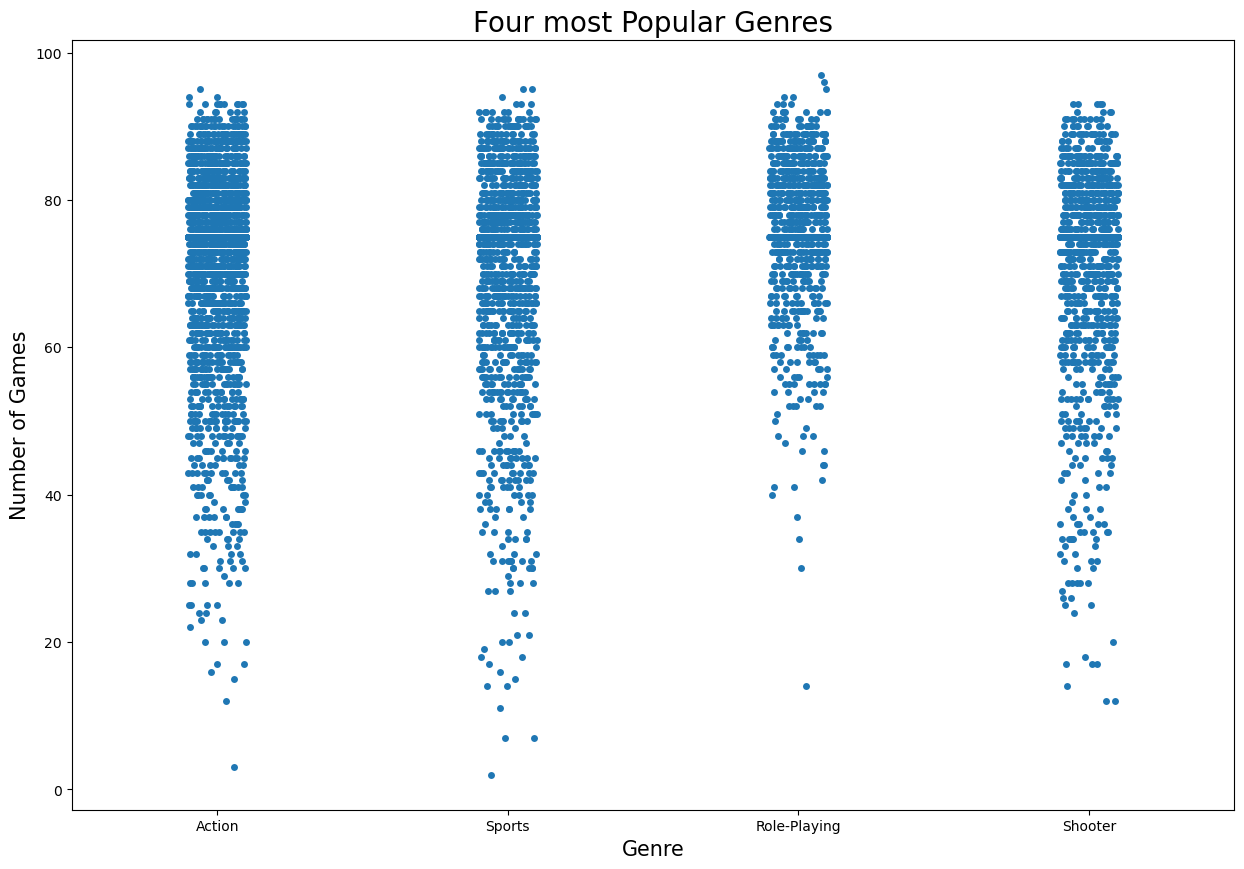

In [36]:
plt.figure(figsize=(15,10))
sns.stripplot(dfQ1_3,x="Genre", y="User_Score")
plt.title("Four most Popular Genres",fontsize=20)
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Number of Games",fontsize=15);

dfQ1_3 = pd.DataFrame({"Frequency":df["Genre"].value_counts(), 
                    "Average User Score":df.groupby("Genre")["User_Score"].mean(),
                    "Average Critic Score":df.groupby("Genre")["Critic_Score"].mean()}) 
dfQ1_3

dfQ1_3.reset_index(inplace=True)

dfQ1_3.drop(index=(3),axis= 0,inplace=True)

dfQ1_3=dfQ1_3.nlargest(4,"Frequency",keep="all")

dfQ1_3

dfQ1_3.plot(kind='bar',x="index")
plt.title('Comparison of User Scores and Critic Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(["User Score", "Critic Score"])
plt.show()

plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_3,x="Average User Score",y="Average Critic Score", hue="index")
plt.title("Four most Popular Genres",fontsize=20)
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Number of Games",fontsize=15);

In [45]:
dfQ1_4=df.groupby("Year_of_Release")["EU_Sales"].mean()
dfQ1_4=pd.DataFrame(dfQ1_4)
dfQ1_4.reset_index(inplace=True)

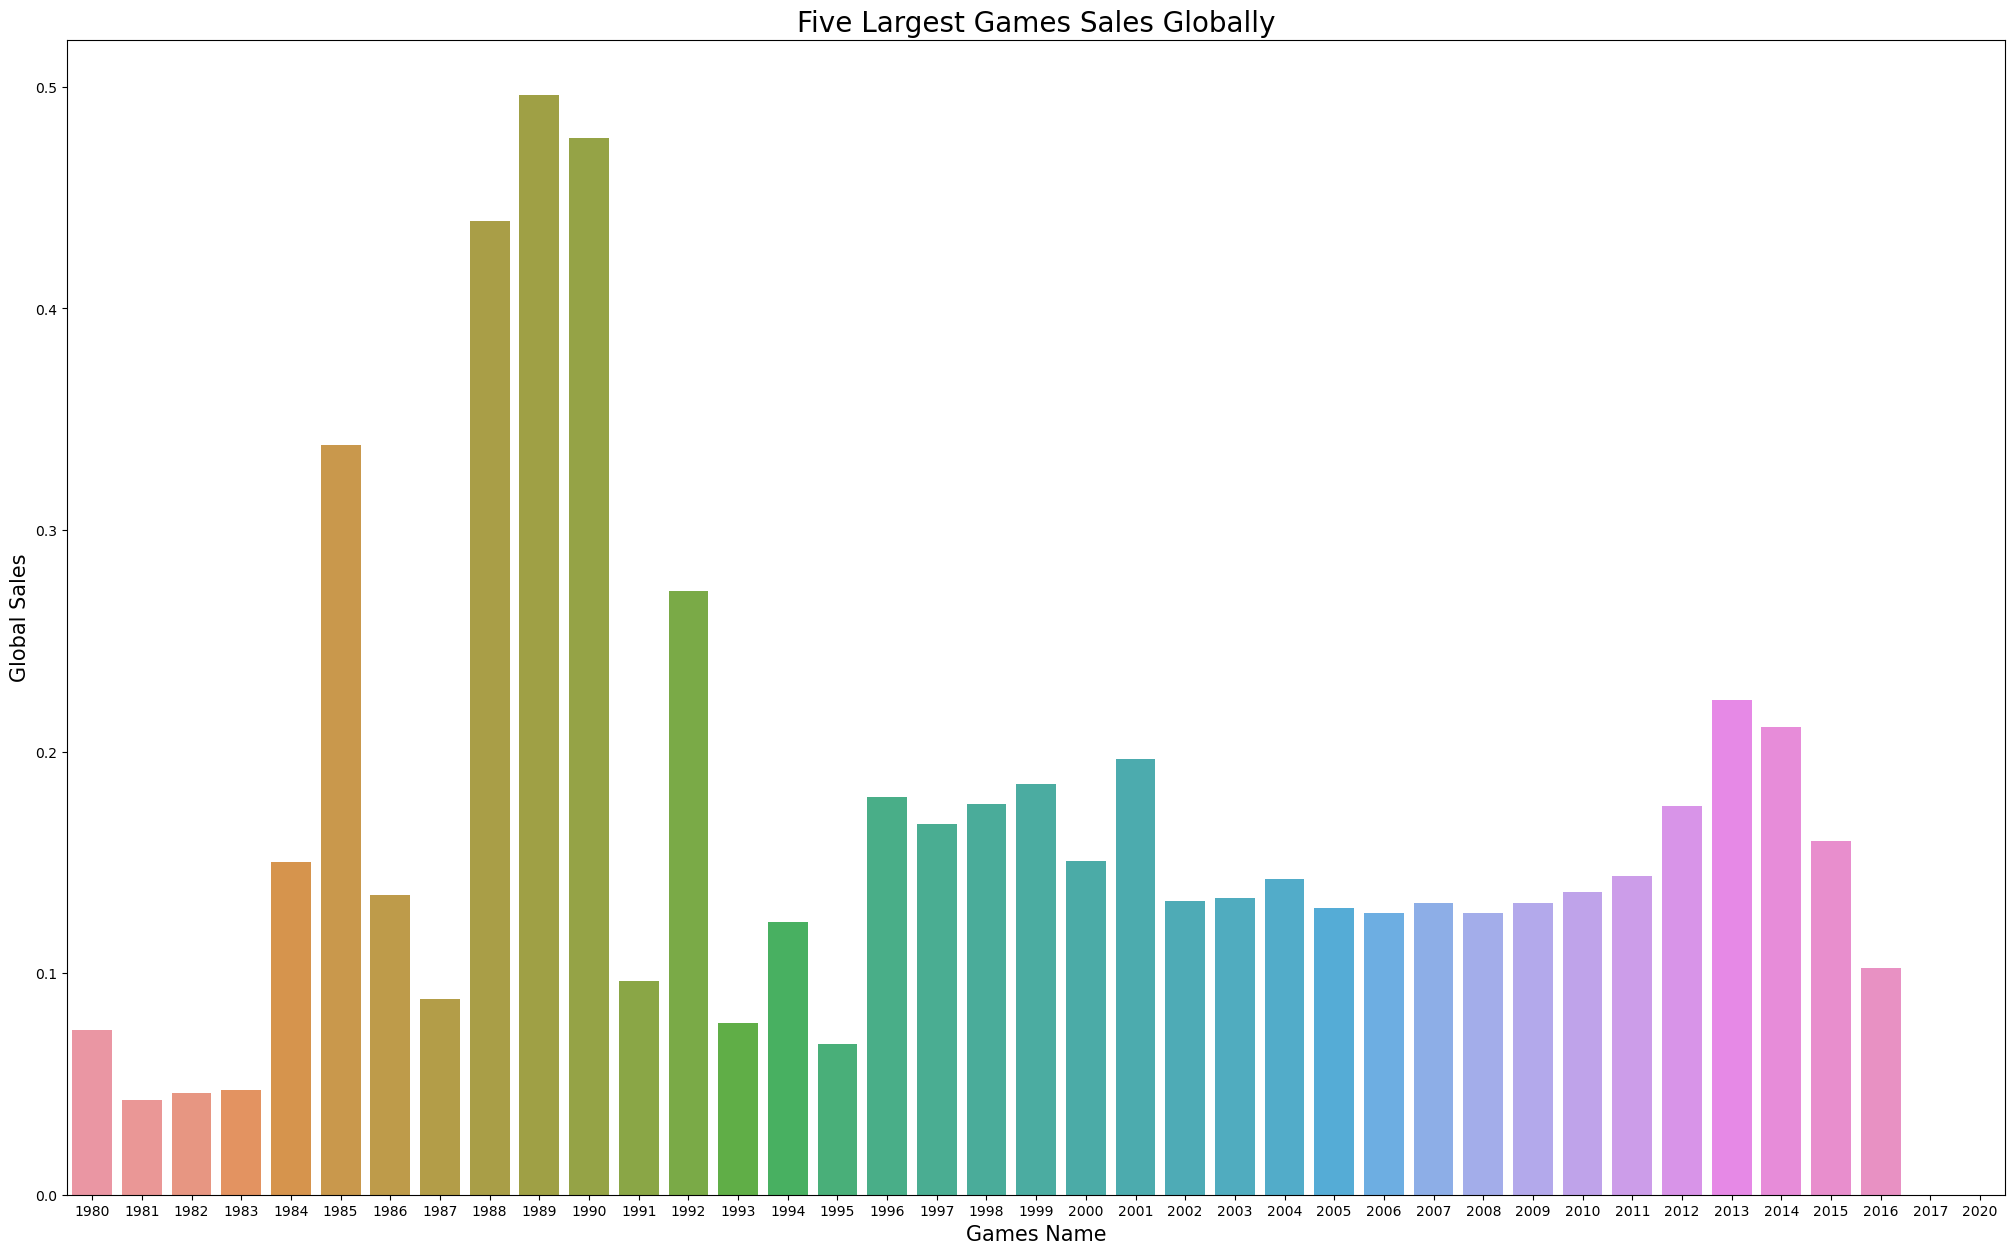

In [51]:
plt.figure(figsize=(25,15))
sns.barplot(dfQ1_4,x="Year_of_Release",y="EU_Sales",kde=)
plt.title("Five Largest Games Sales Globally",fontsize=20)
plt.xlabel("Games Name",fontsize=15)
plt.ylabel("Global Sales",fontsize=15);